In [3]:
import numpy as np
import datajoint as dj
pinky = dj.create_virtual_module("pinky","microns_pinky")

Connecting celiib@10.28.0.34:3306


In [4]:
pinky.SpineValidationStatistics() & "n_false_negatives>2" & "n_false_positive>2"

segmentation segmentation id,segment_id segment id unique within each Segmentation,decimation_ratio,"compartment_type Basal, Apical, spine head, etc.",component_index Which sub-compartment of a certain label this is.,author_original name of last editor,author_proofreader name of last editor,starting_index starting index for the slice generation algorithm,n_triangles number of triangles used for slice,date_time the last time it was edited,"n_auto_spine number of faces classified as spine,spine-head or spine-neck by auto-classifier",n_auto_shaft number of faces classified as shaft by auto-classifier,"n_false_negatives number of spines incorrectly autoclassified as shaft (merged spines would add 2,3,4...etc)",n_false_positive number of sections of the shaft that were incorrectly classified as spine,true_positives number of spines correctly classified as spines,n_merged_spines total number of additional spines that resulted from being merged with others,perc_spines_with_merges percentage of the true positive count that also had other spines merged onto it,n_spines_with_overspined total number out of the true positives that had overspining occuring on their labeling,"average_percentage_overspined for those that had overspining, the average face percentage that were labeled as overspined",avg_spine_size average number of faces for the true positive spines
3,648518346349495935,0.35,Basal,1,computer_Auto,js48,70323,30000,2019-08-27 16:47:11,11061,18939,3,3,50,2,0.04444,2,0.65823,185.88889


In [5]:
true_positive_excitatory, n_false_negatives_excitatory = pinky.SpineValidationStatistics().fetch("true_positives","n_false_negatives")
true_positive_orphan, n_false_negatives_orphan = pinky.SpineValidationStatisticsOrphan().fetch("true_positives","n_false_negatives")
total_true_positive_excitatory = sum(true_positive_excitatory)
print("total_true_positive_excitatory = " + str(total_true_positive_excitatory))
total_n_false_negatives_excitatory = sum(n_false_negatives_excitatory)
print("total_n_false_negatives_excitatory = " + str(total_n_false_negatives_excitatory))
total_true_positive_orphan = sum(true_positive_orphan)
print("total_true_positive_orphan = " + str(total_true_positive_orphan))
total_n_false_negatives_orphan = sum(n_false_negatives_orphan)
print("total_n_false_negatives_orphan = " + str(total_n_false_negatives_orphan))


excitatory_recall =total_true_positive_excitatory/(total_true_positive_excitatory + total_n_false_negatives_excitatory)
orphan_recall = total_true_positive_orphan/(total_true_positive_orphan + total_n_false_negatives_orphan )
total_recall = (total_true_positive_excitatory + total_true_positive_orphan)/(total_true_positive_excitatory + total_true_positive_orphan + total_n_false_negatives_excitatory + total_n_false_negatives_orphan)
print("***************")
print("excitatory_recall = " + str(excitatory_recall))
print("orphan_recall = " + str(orphan_recall))
print("total_recall = " + str(total_recall))
#print(excitatory_recall,orphan_recall,total_recall)



total_true_positive_excitatory = 7918
total_n_false_negatives_excitatory = 431
total_true_positive_orphan = 5121
total_n_false_negatives_orphan = 112
***************
excitatory_recall = 0.9483770511438495
orphan_recall = 0.9785973628893561
total_recall = 0.9600206155205419


In [6]:
true_positive_excitatory, n_false_positives_excitatory = pinky.SpineValidationStatistics().fetch("true_positives","n_false_positive")
true_positive_orphan, n_false_positives_orphan = pinky.SpineValidationStatisticsOrphan().fetch("true_positives","n_false_positive")
total_true_positive_excitatory = sum(true_positive_excitatory)
print("total_true_positive_excitatory = " + str(total_true_positive_excitatory))
total_n_false_positives_excitatory = sum(n_false_positives_excitatory)
print("total_n_false_positives_excitatory = " + str(total_n_false_positives_excitatory))
total_true_positive_orphan = sum(true_positive_orphan)
print("total_true_positive_orphan = " + str(total_true_positive_orphan))
total_n_false_positives_orphan = sum(n_false_positives_orphan)
print("total_n_false_positives_orphan = " + str(total_n_false_positives_orphan))


excitatory_precision =total_true_positive_excitatory/(total_true_positive_excitatory + total_n_false_positives_excitatory)
orphan_precision = total_true_positive_orphan/(total_true_positive_orphan + total_n_false_positives_orphan )
total_precision = (total_true_positive_excitatory + total_true_positive_orphan)/(total_true_positive_excitatory + total_true_positive_orphan + total_n_false_positives_excitatory + total_n_false_positives_orphan)

print("***************")
print("excitatory_precision = " + str(excitatory_precision))
print("orphan_precision = " + str(orphan_precision))
print("total_precision = " + str(total_precision))


total_true_positive_excitatory = 7918
total_n_false_positives_excitatory = 46
total_true_positive_orphan = 5121
total_n_false_positives_orphan = 22
***************
excitatory_precision = 0.9942240080361627
orphan_precision = 0.995722341046082
total_precision = 0.9948119325551232


In [8]:
#calculate the f1 score
# f1 = precision*recall/(precision + recal)
excitatory_f1 = 2*excitatory_precision*excitatory_recall/(excitatory_precision + excitatory_recall)
orphan_f1 = 2*orphan_precision*orphan_recall/(orphan_precision + orphan_recall)
total_f1 = 2* total_precision*total_recall/(total_precision + total_recall)

print("***************")
print("excitatory_f1 = " + str(excitatory_f1))
print("orphan_f1 = " + str(orphan_f1))
print("total_f1 = " + str(total_f1))


***************
excitatory_f1 = 0.970759516949672
orphan_f1 = 0.9870855821125675
total_f1 = 0.9771066731612276


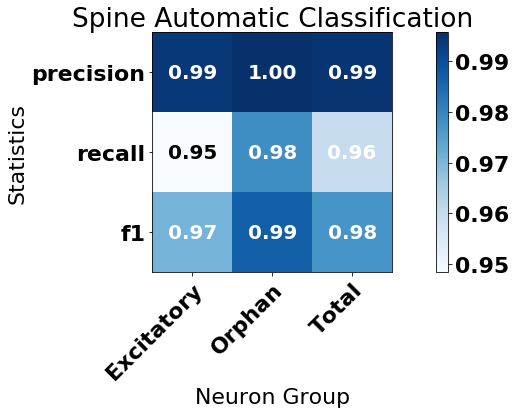

In [17]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
import matplotlib
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt

classes_abridges = ["Excitatory","Orphan","Total"]

cm = np.array([[excitatory_precision,orphan_precision,total_precision ],
             [excitatory_recall,orphan_recall,total_recall],
             [excitatory_f1,orphan_f1,total_f1]])

accuracies = cm

normalize = True
cmap=plt.cm.Blues
#now graph the results for all the categories
title = "Spine Automatic Classification"

fig, ax = plt.subplots()
im = ax.imshow(accuracies, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(accuracies.shape[1]),
       yticks=np.arange(accuracies.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes_abridges, yticklabels=["precision","recall","f1"],
       title=title,
       ylabel='Statistics',
       xlabel='Neuron Group')

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
fmt = '.2f' if normalize else 'd'
thresh = .96
#print("threshold = " + str(thresh))
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        #print("cm[i,j] = " + str(cm[i,j]))
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black",
               fontsize=20)
fig.tight_layout()

fig.set_size_inches(20, 12)
ax.grid(False)
